# 1. Exploratory Data Analysis

This project uses data obtained from the Kaggle [ECG Heartbeat Categorization Database](https://www.kaggle.com/shayanfazeli/heartbeat). The data used in this dataset was obtained by the authors of the dataset from two famous datasets in heartbeat classification, the [MIT-BIH Arrhythmia Dataset](https://www.physionet.org/content/mitdb/1.0.0/) and The [PTB Diagnostic ECG Database](https://www.physionet.org/content/ptbdb/1.0.0/).

The csv files mitbih_train.csv and mitbih_test.csv are form the MIT-BIH Arrythimia Dataset, and the ptbdb_normal.csv and ptbdb_abnormal.csv are from the PTB Diagnostic ECG Database.

The details of the respective datasets are as follows:


#### MIT-BIH Arrythimia Dataset

* Number of Samples: 109446
* Number of Categories: 5
* Sampling Frequency: 125Hz
* Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]


     These correspond to

        N: Normal beat

        S: Supraventricular premature beat

        V: Premature ventricular contraction

        F: Fusion of ventricular and normal beat

        Q: Unclassifiable beat

####  PTB Diagnostic ECG Database

* Number of Samples: 14552
* Number of Categories: 2
* Sampling Frequency: 125Hz
* Classes [0: Normal Hearbeat, 1: Abnormal Hearbeat]

Both the datasets contain time series data along each row. They are also filled in with zeros at the end of each timeseries, to make sure that they do not have any missing values due the difference in length between each series.

Since both these datasets have different labels except for the Normal Heartbeat, we are going to be looking at these datasets independently.

Lets start with importing the datasets and taking a quick look at them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_normal = pd.read_csv('ptbdb_normal.csv')
df_abnormal = pd.read_csv('ptbdb_abnormal.csv')
df_train = pd.read_csv('mitbih_train.csv')
df_test = pd.read_csv('mitbih_test.csv')

In [3]:
df_normal.isna().any().any()

False

In [4]:
df_normal.head()

1.000000000000000000e+00  9.003241658210754395e-01  \
0                  1.000000                  0.794681   
1                  0.909029                  0.791482   
2                  1.000000                  0.478893   
3                  1.000000                  0.867238   
4                  0.948983                  0.505265   

   3.585899472236633301e-01  5.145867168903350830e-02  \
0                  0.375387                  0.116883   
1                  0.423169                  0.186712   
2                  0.056760                  0.064176   
3                  0.201360                  0.099349   
4                  0.004176                  0.022513   

   4.659643396735191345e-02  1.268233358860015869e-01  \
0                  0.000000                  0.171923   
1                  0.000000                  0.007836   
2                  0.081289                  0.072732   
3                  0.141336                  0.120934   
4                  0.059550                  0.107298   

   1.333063244819641113e-01  1.191247999668121338e-01  \
0                  0.283859                  0.293754   
1                  0.063032                  0.077002   
2                  0.055619                  0.048774   
3                  0.108516                  0.096393   
4                  0.110385                  0.111293   

   1.106158867478370667e-01  1.130470037460327148e-01  ...  \
0                  0.325912                  0.345083  ...   
1                  0.074957                  0.077342  ...   
2                  0.054478                  0.041643  ...   
3                  0.093436                  0.100828  ...   
4                  0.116558                  0.118192  ...   

   0.000000000000000000e+00.56  0.000000000000000000e+00.57  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.58  0.000000000000000000e+00.59  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.60  0.000000000000000000e+00.61  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.62  0.000000000000000000e+00.63  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.64  0.000000000000000000e+00.65  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 188 columns]

In [5]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 5.8 MB


In [6]:
df_abnormal.isna().any().any()

False

In [7]:
df_abnormal.head()

9.322328567504882812e-01  8.696785569190979004e-01  \
0                  1.000000                  0.606941   
1                  1.000000                  0.951613   
2                  0.977819                  0.899261   
3                  0.935618                  0.801661   
4                  0.925265                  0.433352   

   8.861859440803527832e-01  9.296264052391052246e-01  \
0                  0.384181                  0.254237   
1                  0.923963                  0.853303   
2                  0.230129                  0.032348   
3                  0.805815                  1.000000   
4                  0.073620                  0.079197   

   9.087749719619750977e-01  9.339704513549804688e-01  \
0                  0.223567                  0.276836   
1                  0.791859                  0.734255   
2                  0.142329                  0.223660   
3                  0.722741                  0.480789   
4                  0.136643                  0.182934   

   8.010425567626953125e-01  7.497828006744384766e-01  \
0                  0.253430                  0.184826   
1                  0.672043                  0.685100   
2                  0.328096                  0.367837   
3                  0.454829                  0.319834   
4                  0.182934                  0.182376   

   6.872285008430480957e-01  6.350998878479003906e-01  ...  \
0                  0.153349                  0.121872  ...   
1                  0.670507                  0.667435  ...   
2                  0.381701                  0.389094  ...   
3                  0.266874                  0.308411  ...   
4                  0.196877                  0.203569  ...   

   0.000000000000000000e+00.117  0.000000000000000000e+00.118  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.119  0.000000000000000000e+00.120  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.121  0.000000000000000000e+00.122  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.123  0.000000000000000000e+00.124  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           0.0   

   0.000000000000000000e+00.125  1.000000000000000000e+00.1  
0                           0.0                         1.0  
1                           0.0                         1.0  
2                           0.0                         1.0  
3                           0.0                         1.0  
4                           0.0                         1.0  

[5 rows x 188 columns]

In [8]:
df_abnormal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(188)
memory usage: 15.1 MB


In [9]:
df_train.isna().any().any()

False

In [10]:
df_train.head()

9.779411554336547852e-01  9.264705777168273926e-01  \
0                  0.960114                  0.863248   
1                  1.000000                  0.659459   
2                  0.925414                  0.665746   
3                  0.967136                  1.000000   
4                  0.927461                  1.000000   

   6.813725233078002930e-01  2.450980395078659058e-01  \
0                  0.461538                  0.196581   
1                  0.186486                  0.070270   
2                  0.541436                  0.276243   
3                  0.830986                  0.586854   
4                  0.626943                  0.193437   

   1.544117629528045654e-01  1.911764740943908691e-01  \
0                  0.094017                  0.125356   
1                  0.070270                  0.059459   
2                  0.196133                  0.077348   
3                  0.356808                  0.248826   
4                  0.094991                  0.072539   

   1.519607901573181152e-01  8.578431606292724609e-02  \
0                  0.099715                  0.088319   
1                  0.056757                  0.043243   
2                  0.071823                  0.060773   
3                  0.145540                  0.089202   
4                  0.043178                  0.053541   

   5.882352963089942932e-02  4.901960864663124084e-02  ...  \
0                  0.074074                  0.082621  ...   
1                  0.054054                  0.045946  ...   
2                  0.066298                  0.058011  ...   
3                  0.117371                  0.150235  ...   
4                  0.093264                  0.189983  ...   

   0.000000000000000000e+00.79  0.000000000000000000e+00.80  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.81  0.000000000000000000e+00.82  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.83  0.000000000000000000e+00.84  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.85  0.000000000000000000e+00.86  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.87  0.000000000000000000e+00.88  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 188 columns]

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [12]:
df_test.isna().any().any()

False

In [13]:
df_test.head()

1.000000000000000000e+00  7.582644820213317871e-01  \
0                  0.908425                  0.783883   
1                  0.730088                  0.212389   
2                  1.000000                  0.910417   
3                  0.570470                  0.399329   
4                  1.000000                  0.923664   

   1.115702465176582336e-01  0.000000000000000000e+00  \
0                  0.531136                  0.362637   
1                  0.000000                  0.119469   
2                  0.681250                  0.472917   
3                  0.238255                  0.147651   
4                  0.656489                  0.195929   

   8.057851344347000122e-02  7.851240038871765137e-02  \
0                  0.366300                  0.344322   
1                  0.101770                  0.101770   
2                  0.229167                  0.068750   
3                  0.000000                  0.003356   
4                  0.111959                  0.175573   

   6.611569970846176147e-02  4.958677664399147034e-02  \
0                  0.333333                  0.307692   
1                  0.110619                  0.123894   
2                  0.000000                  0.004167   
3                  0.040268                  0.080537   
4                  0.122137                  0.050891   

   4.752065986394882202e-02  3.512396663427352905e-02  ...  \
0                  0.296703                  0.300366  ...   
1                  0.115044                  0.132743  ...   
2                  0.014583                  0.054167  ...   
3                  0.070470                  0.090604  ...   
4                  0.035623                  0.055980  ...   

   0.000000000000000000e+00.56  0.000000000000000000e+00.57  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.58  0.000000000000000000e+00.59  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.60  0.000000000000000000e+00.61  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.62  0.000000000000000000e+00.63  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   0.000000000000000000e+00.64  0.000000000000000000e+00.65  
0                          0.0                          0.0  
1                          0.0                          0.0  
2                          0.0                          0.0  
3                          0.0                          0.0  
4                          0.0                          0.0  

[5 rows x 188 columns]

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 31.4 MB


All of the above datasets seem to be similar. There are also no missing values in any of the DataFrames.


The columns do not have useful names so let's rename them. I have arbitrarily chosen to rename them by as their respective columns numbers using a utility function in the my_utils.py file.

In [15]:
from my_utils import rename_cols

In [16]:
rename_cols(df_normal)
rename_cols(df_abnormal)
rename_cols(df_train) 
rename_cols(df_test)

In [17]:
df_normal.head()

0         1         2         3         4         5         6    \
0  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
1  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
2  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
3  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
4  0.948983  0.505265  0.004176  0.022513  0.059550  0.107298  0.110385   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.111293  0.116558  0.118192  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

## Visualization

Let's now have a look at the time series data in each of these dataframes, to see if we can find any patterns.  

We will start with df_normal, which contains examples of normal heartbeats. I am going to plot all rows of data on the same plot overlaying each other. 

I have excluded the last column as it represents the target variable.


The data was recorded at 125 Hz, so 186 readings represent approximately 1.5 seconds of data.

In [18]:
from my_utils import plot_series

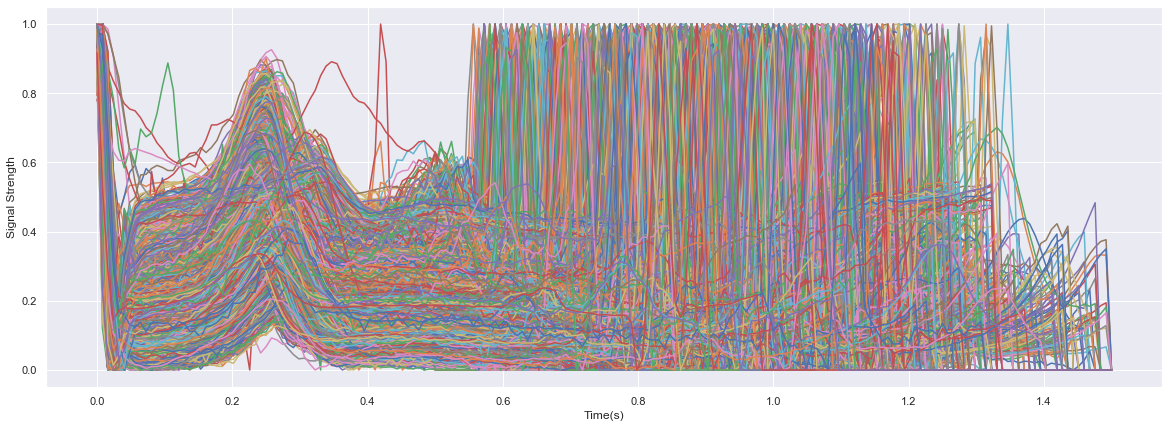

In [19]:
plot_series(df_normal.iloc[:, :-1])

That is a messy plot however, you can see that there is a distinct pattern between all the rows. Let's try the same for the other data.

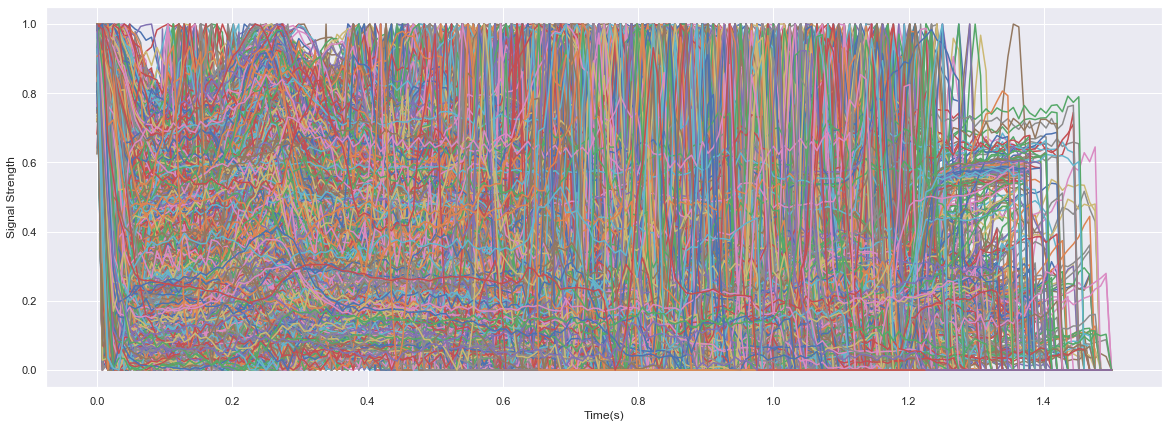

In [20]:
plot_series(df_abnormal.iloc[:, :-1])

This one is a lot messier, however, it is possible to see that there are distinct patterns even within these readings. These may be different kinds of abnormalities, that have to be classified.

Let's now try the same for the training dataset. 

This dataset has 87553 entries, and contains multiple classifications. We will try and plot these by grouping them according to the target to see if there are any visible patterns.

The various classes represented in the dataset is as follows.


‘N’: 0, ‘S’: 1, ‘V’: 2, ‘F’: 3, ‘Q’: 4

These correspond to

N: Normal beat

S: Supraventricular premature beat

V: Premature ventricular contraction

F: Fusion of ventricular and normal beat

Q: Unclassifiable beat


In [21]:
df_train[187].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

Since there are a around 72000 Normal beat rows in the dataset, let's just plot the first 9000, to reduce computation time.

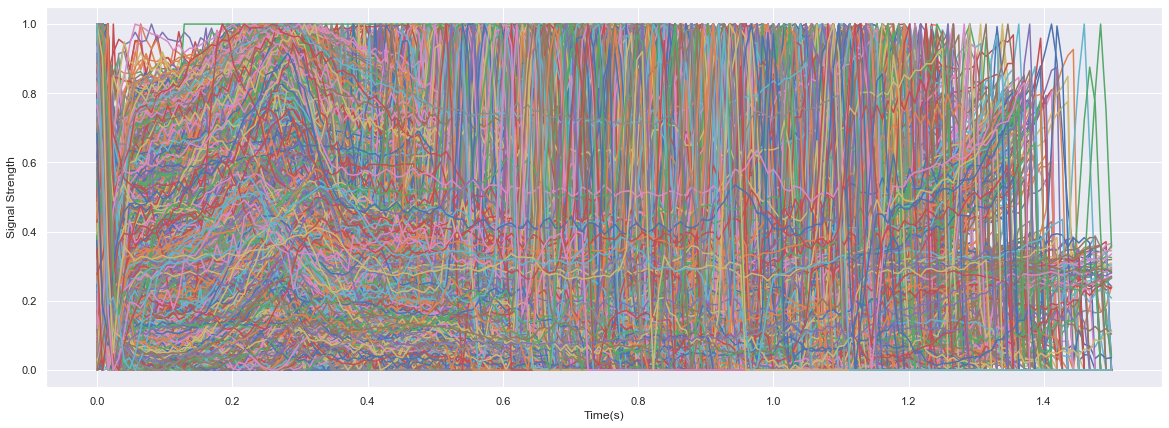

In [22]:
plot_series(df_train[df_train[187] == 0].iloc[:, :-1], n = 9000)

Not as clean as the example dataset in df_normal. However, we can still see those distinct patterns.

Let's now plot the hearbeats classified as a Superventricular premature beat.

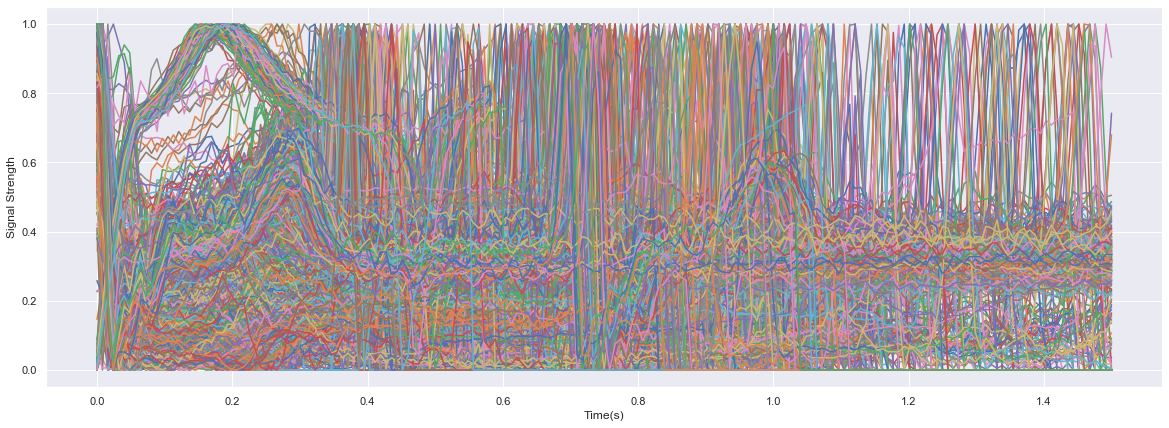

In [23]:
plot_series(df_train[df_train[187] == 1].iloc[:, :-1])

The patterns are at various different lengths, however they are still distinguishable.

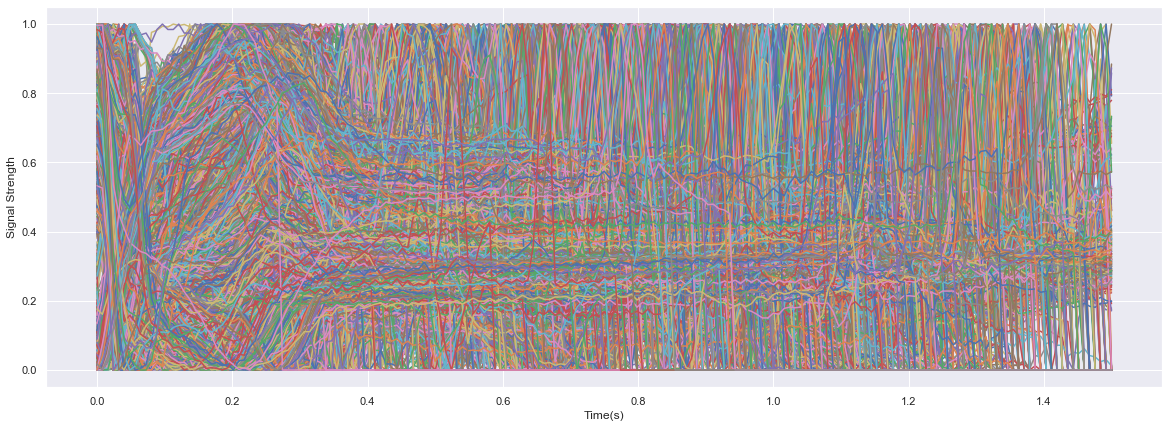

In [24]:
plot_series(df_train[df_train[187] == 2].iloc[:, :-1])

The same holds true for the above plot. However, it looks like more than one pattern can be classified as a Premature Ventricular Contraction.

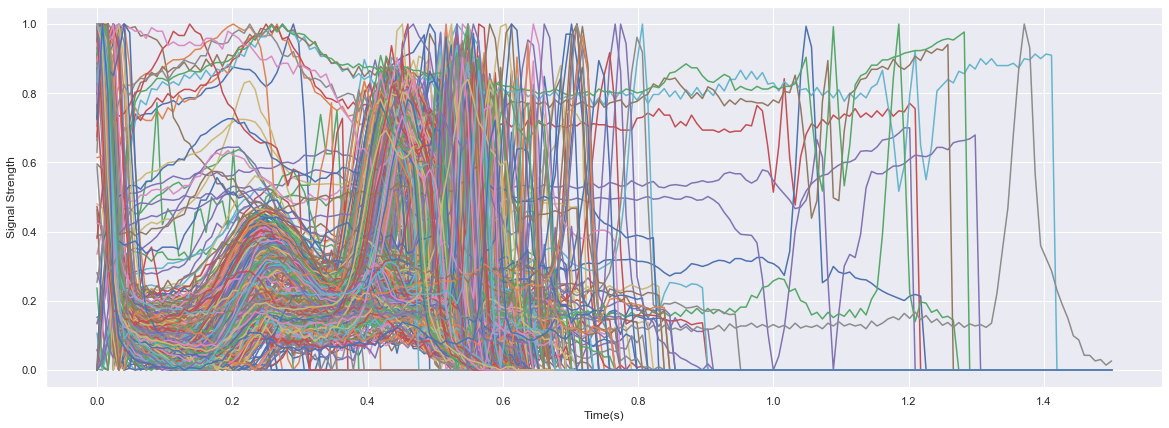

In [25]:
plot_series(df_train[df_train[187] == 3].iloc[:, :-1])

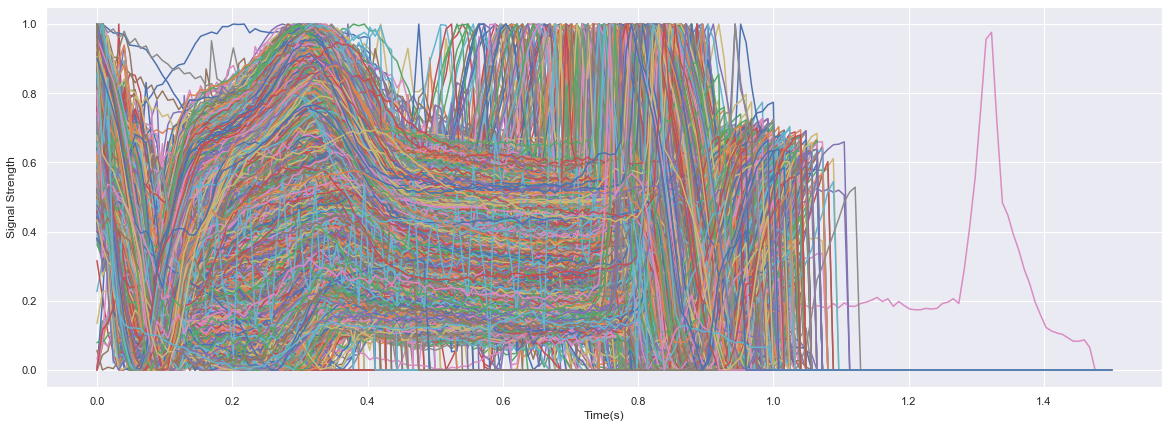

In [26]:
plot_series(df_train[df_train[187] == 4].iloc[:, :-1])

Classes 3 and 4 have a similar conclusion to class 2. There seems to be more than one pattern which can be classified as these classes. These should not be issues as, a learning algorithm will be able to pick up on these details.

Now that we have a good understanding of our datasets and how they look, let's now turn our focus to creating a model that can classify the data according to their respective classes.